# Práctica 2: Aprendizaje automático no supervisado

El objetivo de esta práctica es aplicar algunos algoritmos de aprendizaje automático no supervisado disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre un conjunto de datos e interpretar los resultados obtenidos.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: 08__

__Nombres de los estudiantes: Lubin Ye y Ziteng Huang__

In [18]:
# acceso a google drive

# from google.colab import drive
# drive.mount('/content/drive')

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `housing.csv` que se proporciona junto con la práctica.
Antes de nada, elimina las filas con valores nulos.



In [19]:
import pandas as pd

df = pd.read_csv('./housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [20]:
# Obtenemos la descripción de las variables (medias, desviaciones típicas, rangos, ...)
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [21]:
# Obtenemos la correlación entre las variables numericas
import copy
df1 = copy.deepcopy(df)
df1.drop(['ocean_proximity'], axis=1, inplace=True)
df1.corr()

# Podemos comentar que la correlación es una medida estadística que describe la relación entre dos variables.
#Los valores de la matriz de correlación varían entre -1 y 1:
# 1: Correlación positiva perfecta.
# 0: No hay correlación.
# -1: Correlación negativa perfecta.

# Por tanto todas aquellas que no tengan una gran correlación (valor cercanos a 0) entre sí podemos prescindir de ellas ya que no afectan a la solución

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


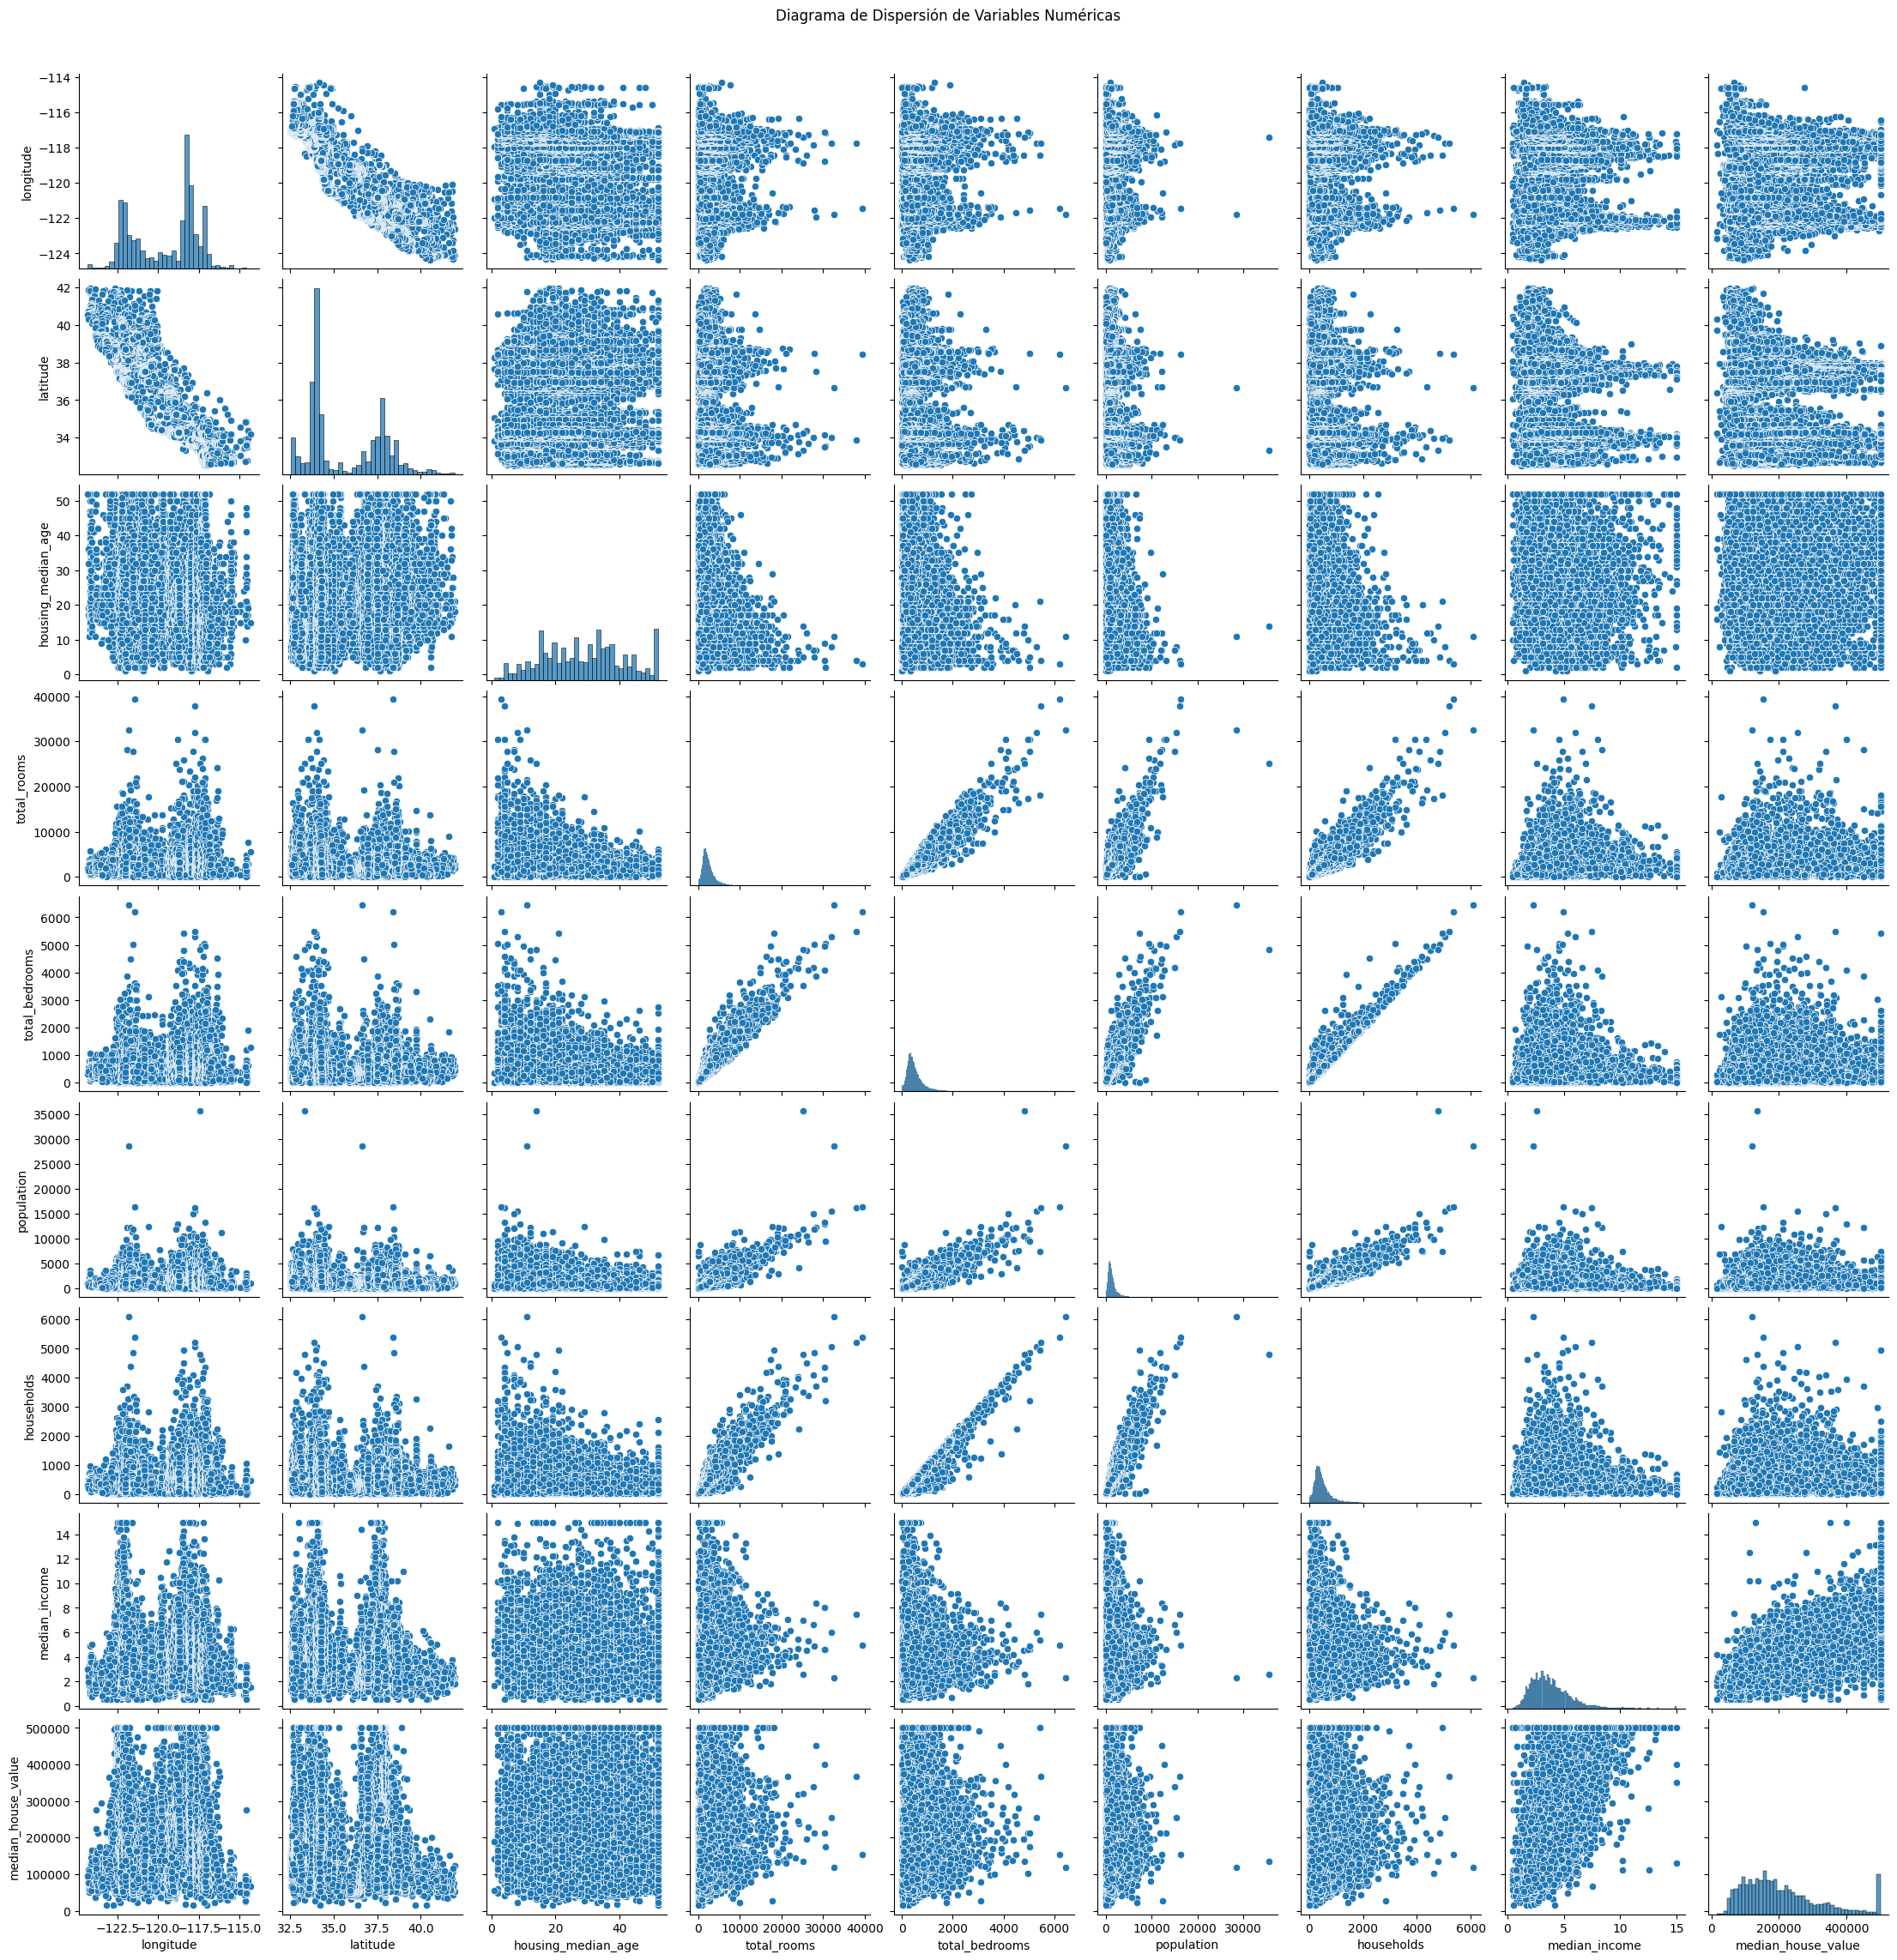

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
# Utilizamos y=1.02 para asegurarnos de que el título superior no se superponga con los subgráficos y esté ligeramente separado de ellos.
plt.suptitle('Diagrama de Dispersión de Variables Numéricas', y=1.02)
plt.show()

# Este diagrama de dispersión nos muestra cómo cambia una variable en función de otra, permitiendo identificar patrones, tendencias y posibles correlaciones entre ellas
# Por ejemplo, vemos que la longitud y la latitud siguen una relación directamente lineal, y por tanto son directamente proporcionales
# Luego, resaltar el numero total de habitaciones con el numero de total de dormitorios también son directamente proporcionales así como population y households


### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

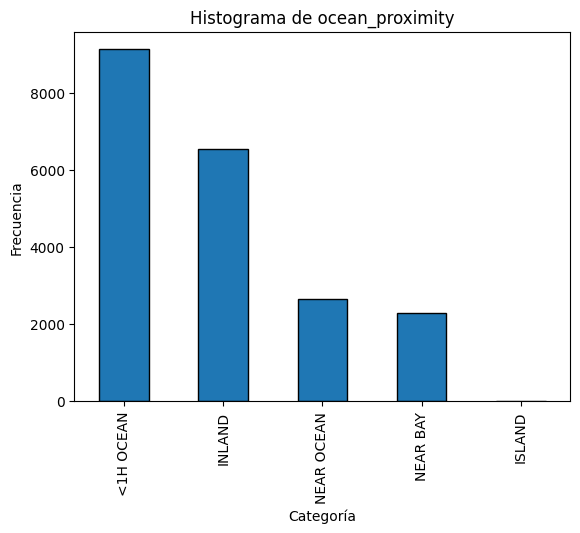

In [23]:
import matplotlib.pyplot as plt

# Obtenemos la columna 'ocean_proximity' del DataFrame df
df['ocean_proximity'].value_counts().plot(kind='bar', edgecolor='black')

plt.title('Histograma de ocean_proximity')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

# Vemos que el valor '<1H OCEAN' es el de mayor frecuencia por lo que deducimos que influye en los resultados

## 3) Preprocesar los datos

Para realizar el clustering puedes decidir quedarte con un subconjunto de las variables. Justifica la respuesta de tu decisión.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [24]:

from sklearn.preprocessing import StandardScaler

# Vamos a eliminar aquellas variables que no tienen correlación con el resto, vamos a suponer todas aquellas con un coeficiente de
# correlación |coe| < 0.6
subset_cols = ['longitude','latitude','total_rooms','total_bedrooms','population','households']

# Filtrar el dataframe para seleccionar solo las columnas relevantes
df_subset = df[subset_cols]

# Preprocesar los datos: estandarización usando StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_subset)

# Convertir los datos preprocesados en un nuevo DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=subset_cols)

# Mostrar el nuevo DataFrame con los datos preprocesados
print(df_scaled.head())


   longitude  latitude  total_rooms  total_bedrooms  population  households
0  -1.327835  1.052548    -0.804819       -0.970325   -0.974429   -0.977033
1  -1.322844  1.043185     2.045890        1.348276    0.861439    1.669961
2  -1.332827  1.038503    -0.535746       -0.825561   -0.820777   -0.843637
3  -1.337818  1.038503    -0.624215       -0.718768   -0.766028   -0.733781
4  -1.337818  1.038503    -0.462404       -0.611974   -0.759847   -0.629157


## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula el índice davies_boulding en función del número de clusters.

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Definir el rango de número de clusters
k_range = range(2, 11)

# Lista para almacenar los resultados del índice davies_bouldin
db_scores = []

# Iterar sobre el rango de número de clusters
for k in k_range:
    # Inicializar y ajustar el modelo KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    
    # Calcular el índice davies_bouldin y almacenarlo en la lista
    db_score = davies_bouldin_score(df_scaled, kmeans.labels_)
    db_scores.append(db_score)

# Encontrar el número óptimo de clusters con el índice más bajo
optimal_clusters = k_range[db_scores.index(min(db_scores))]
print("Número óptimo de clusters:", optimal_clusters)


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 5 elige 5 de ellos que sean bastante diferentes entre sí.

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema.

Realiza una visualización teniendo en cuenta la latitud y la longitud e intenta darle una interpretación.

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [31]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Seleccionar un subconjunto de variables relevantes para el clustering
subset_cols = ['longitude', 'latitude', 'median_income', 'median_house_value']

# Filtrar el dataframe para seleccionar solo las columnas relevantes
df_subset = df[subset_cols]

# Preprocesar los datos si es necesario
# En este caso, suponemos que los datos ya están escalados

# Inicializar y ajustar el modelo KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(df_scaled)

# Asignar las etiquetas de clusters al conjunto de datos original
df['cluster_label'] = kmeans.labels_

# Describir los clusters
cluster_stats = df.groupby('cluster_label').describe()[subset_cols]

# Mostrar los descriptores estadísticos de cada cluster
print(cluster_stats)

# Visualización: Scatter plot de latitud y longitud con colores por cluster
plt.figure(figsize=(10, 6))
for label in df['cluster_label'].unique():
    cluster_data = df[df['cluster_label'] == label]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {label}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Visualization')
plt.legend()
plt.show()


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## 6) Clustering jerárquico aglomerativo
Repite los apartados 4 y 5 usando clustering jerárquico aglomerativo.



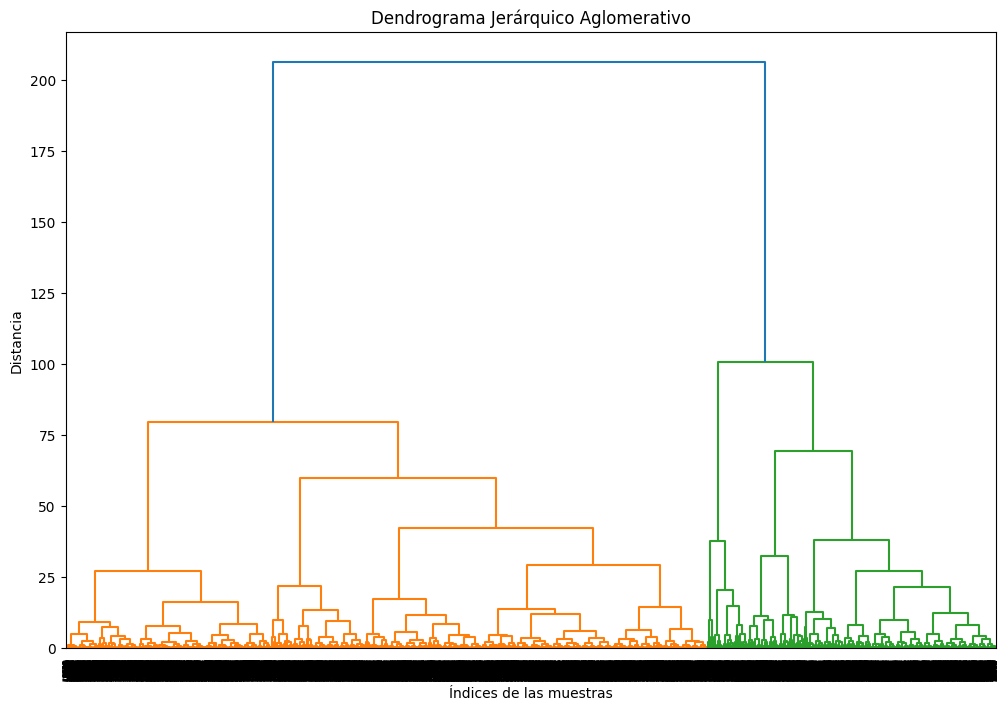

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Seleccionar un subconjunto de variables relevantes para el clustering
subset_cols = ['median_income', 'median_house_value']

# Filtrar el dataframe para seleccionar solo las columnas relevantes
df_subset = df[subset_cols]

# Preprocesar los datos: estandarización usando StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_subset)

# Realizar clustering jerárquico aglomerativo
linkage_matrix = linkage(scaled_data, method='ward')

# Visualizar el dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Dendrograma Jerárquico Aglomerativo')
plt.xlabel('Índices de las muestras')
plt.ylabel('Distancia')
plt.show()


              median_income                                                 \
                      count      mean       std     min       25%      50%   
cluster_label                                                                
1                    4559.0  1.977831  0.481564  0.4999  1.664950  2.01090   
2                    9698.0  3.469287  0.816438  0.5360  2.907775  3.38475   
3                     879.0  9.532151  2.037140  7.0691  8.010800  8.74770   
4                    1255.0  4.931877  1.445640  0.4999  3.782550  5.07310   
5                    4249.0  5.333093  0.986787  3.7500  4.575900  5.17520   

                                 median_house_value                 \
                    75%      max              count           mean   
cluster_label                                                        
1               2.30430   3.2197             4559.0   99325.772538   
2               3.93045   6.4753             9698.0  172860.239121   
3              10.44565  

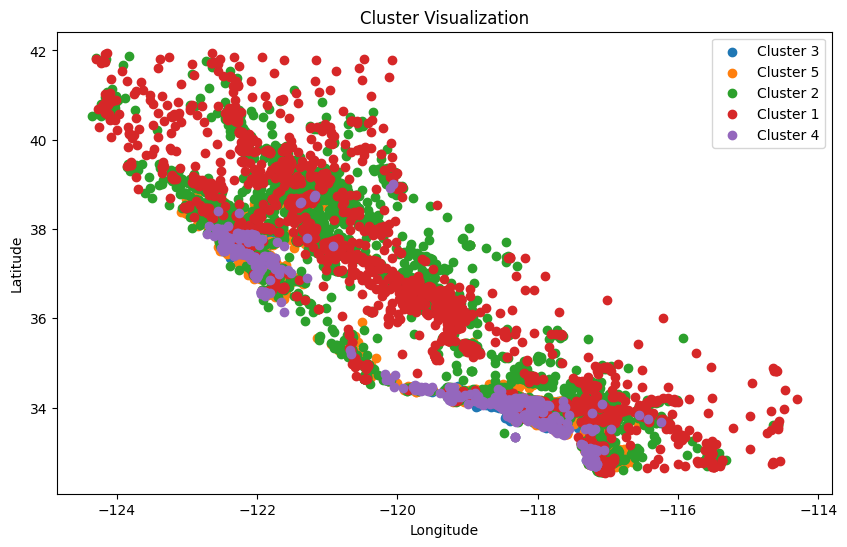

In [30]:
from scipy.cluster.hierarchy import fcluster

# Definir el número óptimo de clusters basado en el dendrograma
optimal_clusters = 5

# Obtener las etiquetas de cluster para cada muestra
cluster_labels = fcluster(linkage_matrix, optimal_clusters, criterion='maxclust')

# Agregar las etiquetas de cluster al dataframe original
df['cluster_label'] = cluster_labels

# Describir los clusters
cluster_stats = df.groupby('cluster_label').describe()[subset_cols]

# Mostrar los descriptores estadísticos de cada cluster
print(cluster_stats)

# Visualización: Scatter plot de latitud y longitud con colores por cluster
plt.figure(figsize=(10, 6))
for label in df['cluster_label'].unique():
    cluster_data = df[df['cluster_label'] == label]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {label}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Visualization')
plt.legend()
plt.show()
